# Topic : Group By

In [1]:
import pandas as pd
df=pd.read_csv("data.csv")
df

,day,city,temperature,windspeed,event
0,01/01/17,new york,32,6,Rain
1,01/02/17,new york,36,7,Sunny
2,01/03/17,new york,28,12,Snow
3,01/04/17,new york,33,7,Sunny
4,01/01/17,mumbai,90,5,Sunny
5,01/02/17,mumbai,85,12,Fog
6,01/03/17,mumbai,87,15,Fog
7,01/04/17,mumbai,92,5,Rain
8,01/01/17,paris,45,20,Sunny
9,01/02/17,paris,50,13,Cloudy


In [2]:
grouped_single = df.groupby('city').agg({'temperature': ['mean', 'min', 'max'],'windspeed':['mean', 'min', 'max']})
grouped_single

temperature         windspeed        
                mean min max      mean min max
city                                          
mumbai         88.50  85  92      9.25   5  15
new york       32.25  28  36      8.00   6  12
paris          47.75  42  54     20.75   8  42

In [3]:
oldcolumn=list(grouped_single.columns)
NewColumn=[]
for i in range(len(oldcolumn)):
    print(oldcolumn[i])
    NewColumn.append("_".join(oldcolumn[i]))
grouped_single.columns=NewColumn
grouped_single.reset_index(inplace=True)
grouped_single

('temperature', 'mean')
('temperature', 'min')
('temperature', 'max')
('windspeed', 'mean')
('windspeed', 'min')
('windspeed', 'max')


,city,temperature_mean,temperature_min,temperature_max,windspeed_mean,windspeed_min,windspeed_max
0,mumbai,88.50,85,92,9.25,5,15
1,new york,32.25,28,36,8.00,6,12
2,paris,47.75,42,54,20.75,8,42


### Find Max. temperature in each of the cities
### Find the average wind spped per city

In [4]:
g= df.groupby("city")
g

In [5]:
for city, city_df in g:
    print(city)
    print(city_df)
    print(city_df["day"].values)

mumbai
        day    city  temperature  windspeed  event
4  01/01/17  mumbai           90          5  Sunny
5  01/02/17  mumbai           85         12    Fog
6  01/03/17  mumbai           87         15    Fog
7  01/04/17  mumbai           92          5   Rain
['01/01/17' '01/02/17' '01/03/17' '01/04/17']
new york
        day      city  temperature  windspeed  event
0  01/01/17  new york           32          6   Rain
1  01/02/17  new york           36          7  Sunny
2  01/03/17  new york           28         12   Snow
3  01/04/17  new york           33          7  Sunny
['01/01/17' '01/02/17' '01/03/17' '01/04/17']
paris
         day   city  temperature  windspeed   event
8   01/01/17  paris           45         20   Sunny
9   01/02/17  paris           50         13  Cloudy
10  01/03/17  paris           54          8  Cloudy
11  01/04/17  paris           42         42  Cloudy
['01/01/17' '01/02/17' '01/03/17' '01/04/17']


In [6]:
g.get_group("mumbai")

,day,city,temperature,windspeed,event
4,01/01/17,mumbai,90,5,Sunny
5,01/02/17,mumbai,85,12,Fog
6,01/03/17,mumbai,87,15,Fog
7,01/04/17,mumbai,92,5,Rain


In [7]:
g.max()

,day,temperature,windspeed,event
city,,,,
mumbai,01/04/17,92,15,Sunny
new york,01/04/17,36,12,Sunny
paris,01/04/17,54,42,Sunny


In [8]:
g.mean()

,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,20.75


In [9]:
g.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                   
             count   mean        std  min    25%   50%    75%   max  
city                                                                 
mumbai         4.0   9.25   5.057997  5.0   5.00   8.5  12.75  15.0  
new york       4.0   8.00   2.708013  6.0   6.75   7.0   8.25  12.0  
paris          4.0  20.75  14.997222  8.0  11.75  16.5  25.50  42.0

city
mumbai      AxesSubplot(0.125,0.125;0.775x0.755)
new york    AxesSubplot(0.125,0.125;0.775x0.755)
paris       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

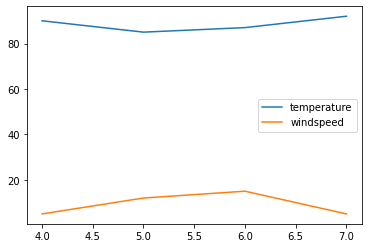

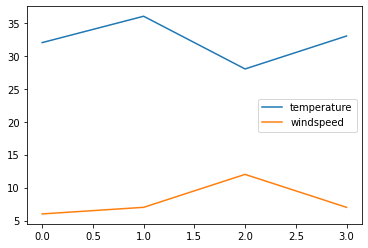

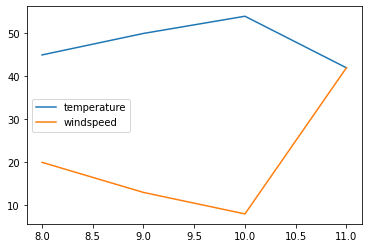

In [10]:
%matplotlib inline
g.plot()